<a href="https://www.kaggle.com/code/nandhinipremkumar/statistical-and-nlp-analysis?scriptVersionId=224364307" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indias-fast-delivery-agents-reviews-and-ratings/Fast Delivery Agent Reviews.csv


In [2]:
# This library is used for structured data operations, like import CSV files, create data frames, and data preparation
import pandas as pd
#This is a mathematical library. Has a powerful N-dimensional array object, linear algebra, Fourier transform, etc.
import numpy as np
#This library is used for visualization of data.
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#This library os used for statistical graphics. It builds on top of matplotlib and integrates closely with pandas DS
import seaborn as sns
#This library os used for probabilistic distributions and statistical operations.
import scipy.stats as stats
from scipy.stats import spearmanr,chi2_contingency,chi2
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
file_path = '/kaggle/input/indias-fast-delivery-agents-reviews-and-ratings/Fast Delivery Agent Reviews.csv'  # Update this with the correct file path
df = pd.read_csv(file_path)

In [4]:

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category = DeprecationWarning)


In [5]:

# Set the display options to show more rows and columns
pd.set_option('display.max_columns', None)  # No column limit
pd.set_option('display.max_rows', None)  # No row limit
pd.set_option('display.max_seq_item', None)  # No item truncation for sequences (like lists)
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '_').str.replace(')', '_')

#To compute the total number of missing values in the data frame.
print(df.isnull().sum())

Agent_Name                 0
Rating                     0
Review_Text                0
Delivery_Time__min_        0
Location                   0
Order_Type                 0
Customer_Feedback_Type     0
Price_Range                0
Discount_Applied           0
Product_Availability       0
Customer_Service_Rating    0
Order_Accuracy             0
dtype: int64


In [6]:

""".................................................Descriptive and Exploratory Data Analysis........................................"""
# Exploratory Data Analysis (EDA) is a crucial step in data science and machine learning that involves analyzing datasets.
# EDA is to summarize their main characteristics and uncover patterns, anomalies, or relationships.

#Returns descriptive statistics about the data like mean, minimum, maximum, standard deviation, etc.
print("Descriptive Statistics of the Data Frame:","\n",df.describe())

#info() is used to generate the summary of the Data Frame, this will include info about columns with their names,
#their datatypes, and missing values.
print("Generate the summary of the Data Frame:")
print(df.info())

#df.shape() display Total no of rows and columns data frame
print("Total no of rows and columns Data Frame:",df.shape)

# Returns unique values for each column and print them as readable lists
unique_values = df[['Agent_Name', 'Location', 'Order_Type']].apply(lambda x: x.unique().tolist())

# Convert to a dictionary and print the entire result
unique_values_dict = unique_values.to_dict()
for column, values in unique_values_dict.items():
    print(f"Unique values for {column}: {values}")

#Returns the number of unique values of all columns
num_unique_values = df[['Agent_Name', 'Location', 'Order_Type']].nunique()
print('Number of unique values for each column:',"\n",num_unique_values)

# the memory usage of each column in bytes.
print("Memory Usage of each column in bytes:","\n",df.memory_usage(index=True, deep=True))

#Calculating  Descriptive Statistics for Numerical Columns
summary_stats = df[['Rating', 'Customer_Service_Rating', 'Delivery_Time__min_']].describe()
mode_values = df[['Rating', 'Customer_Service_Rating', 'Delivery_Time__min_']].mode().iloc[0]
range_values = df[['Rating', 'Customer_Service_Rating', 'Delivery_Time__min_']].max() - df[['Rating', 'Customer_Service_Rating', 'Delivery_Time__min_']].min()

# Calculating Frequency Distribution for  categorical columns
order_type_freq = df['Order_Type'].value_counts()
location_freq = df['Location'].value_counts()
product_availability_freq = df['Product_Availability'].value_counts()

# Return mode and range of Numerical columns
print("\nMode for Numerical Columns:\n", mode_values)
print("\nRange for Numerical Columns:\n", range_values)

# Return Frequency Distribution of categorical  columns
print("\nFrequency Distribution for 'Order Type':\n", order_type_freq)
print("\nFrequency Distribution for 'Location':\n", location_freq)
print("\nFrequency Distribution for 'Product Availability':\n", product_availability_freq)

Descriptive Statistics of the Data Frame: 
            Rating  Delivery_Time__min_  Customer_Service_Rating
count  5000.00000          5000.000000              5000.000000
mean      3.00290            34.962400                 2.972000
std       1.15214            14.789656                 1.409969
min       1.00000            10.000000                 1.000000
25%       2.00000            22.000000                 2.000000
50%       3.00000            35.000000                 3.000000
75%       4.00000            48.000000                 4.000000
max       5.00000            60.000000                 5.000000
Generate the summary of the Data Frame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Agent_Name               5000 non-null   object 
 1   Rating                   5000 non-null   float64
 2   Review_Text 

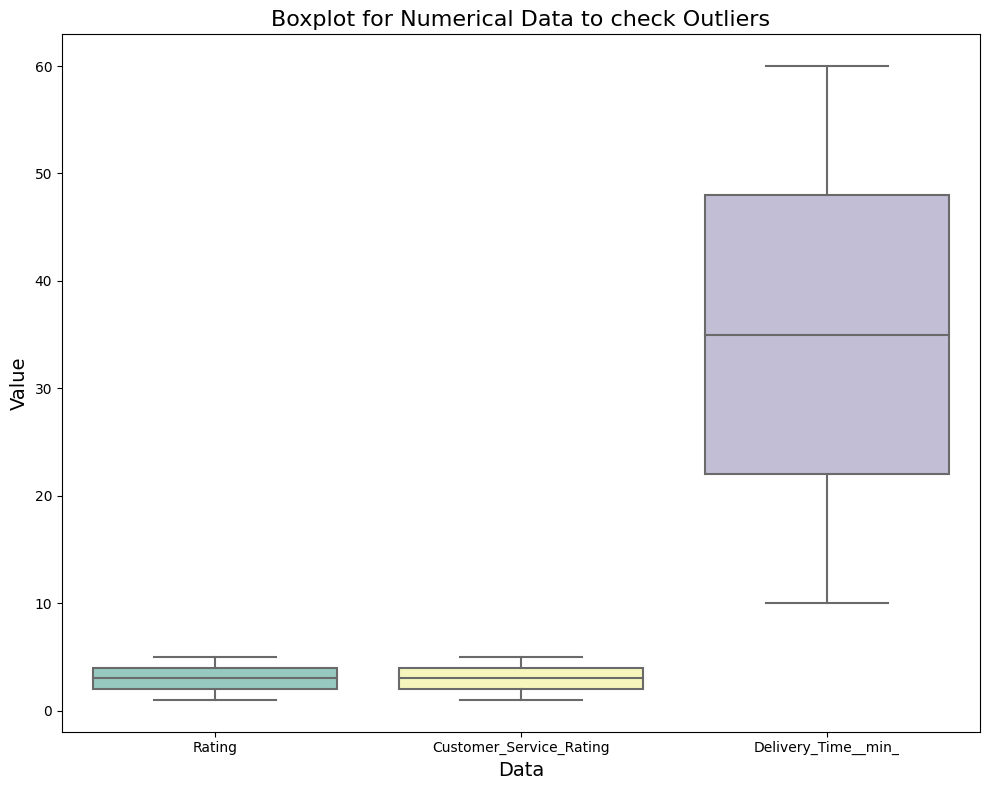

In [7]:

""".................................................Data Visualization..............................................."""

#1. Checking Outliers by boxplot (Numerical Data)
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[['Rating', 'Customer_Service_Rating', 'Delivery_Time__min_']], palette='Set3')
#Labeling and aesthetics
plt.title('Boxplot for Numerical Data to check Outliers', fontsize=16)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Data', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



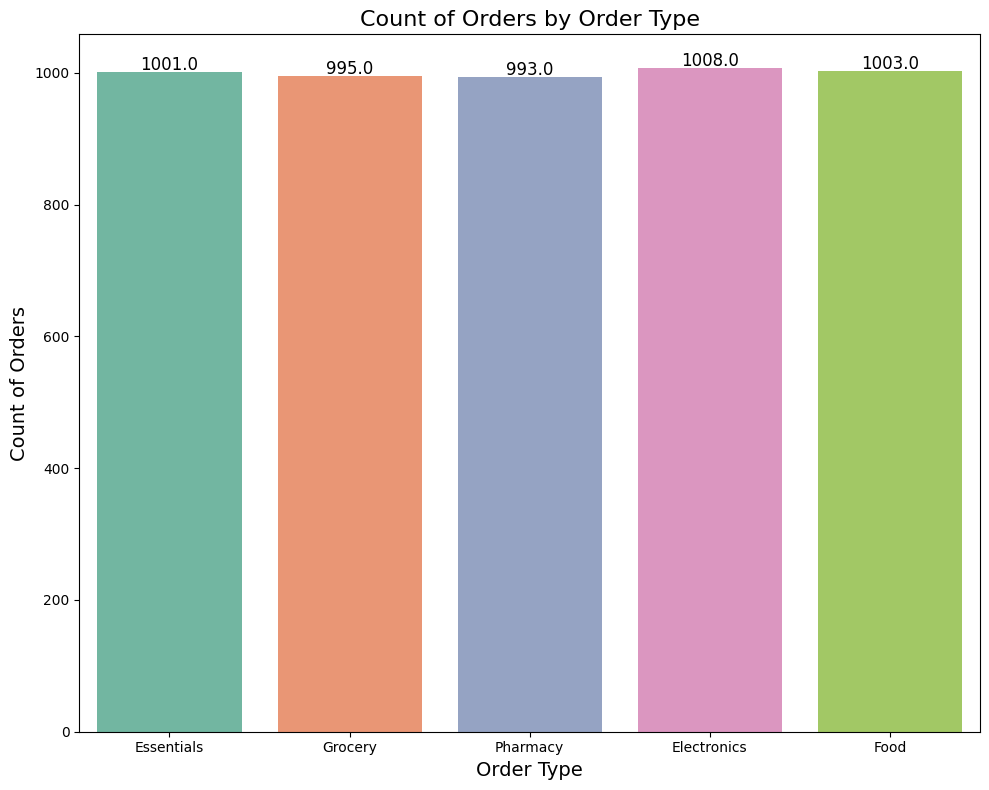

In [8]:
#2. Plotting Frequency Distribution for Order Type with count labels
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='Order_Type', data=df, palette='Set2')
# Labeling and aesthetics
plt.title('Count of Orders by Order Type', fontsize=16)
plt.xlabel('Order Type', fontsize=14)
plt.ylabel('Count of Orders', fontsize=14)
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.show()




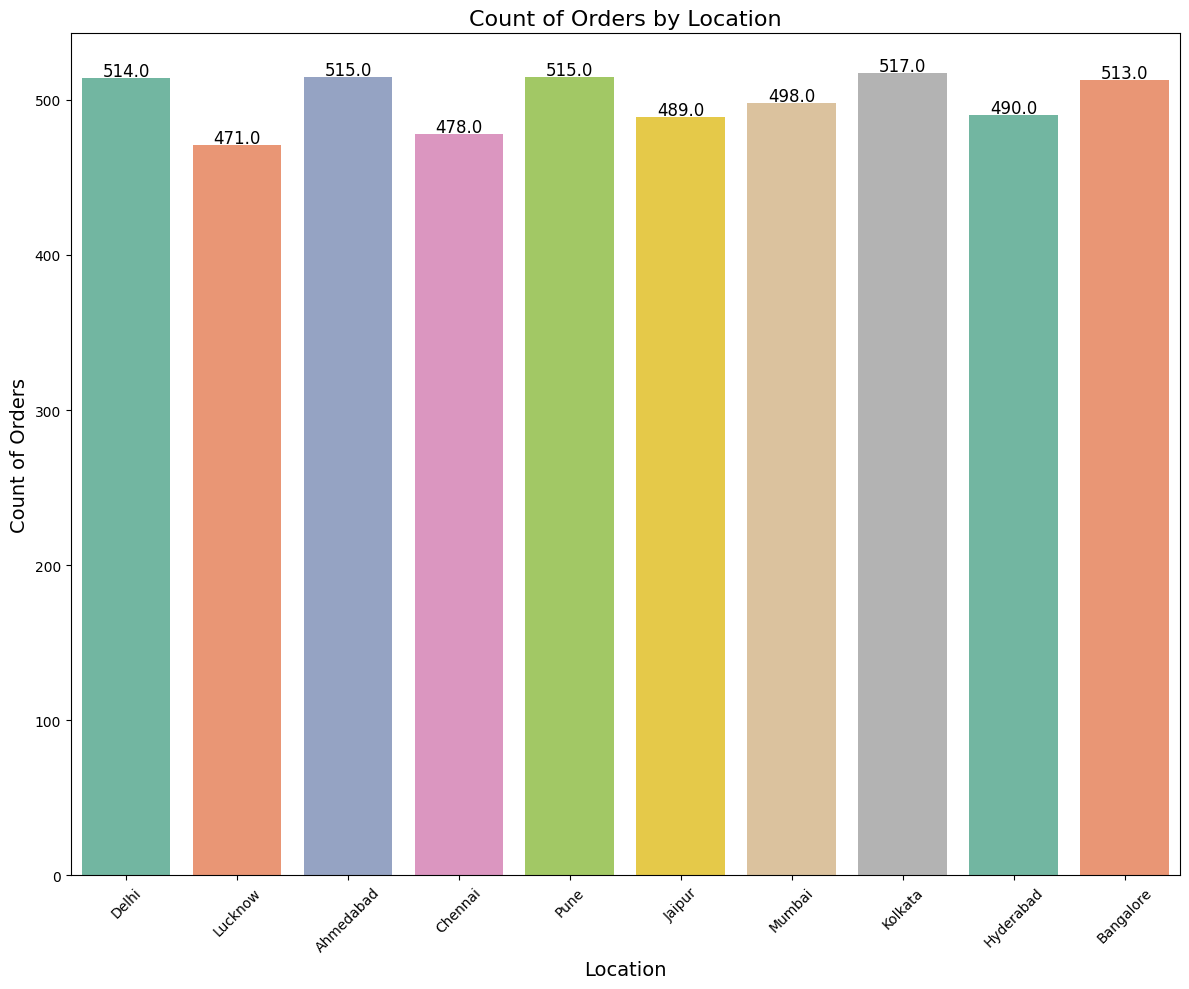

In [9]:
# 3. Plotting Frequency Distribution for Location with count labels
plt.figure(figsize=(12, 10))
ax = sns.countplot(x='Location', data=df, palette='Set2')
# Labeling and aesthetics
plt.title('Count of Orders by Location', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Count of Orders', fontsize=14)
plt.xticks(rotation=45)

# Display count over bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.show()


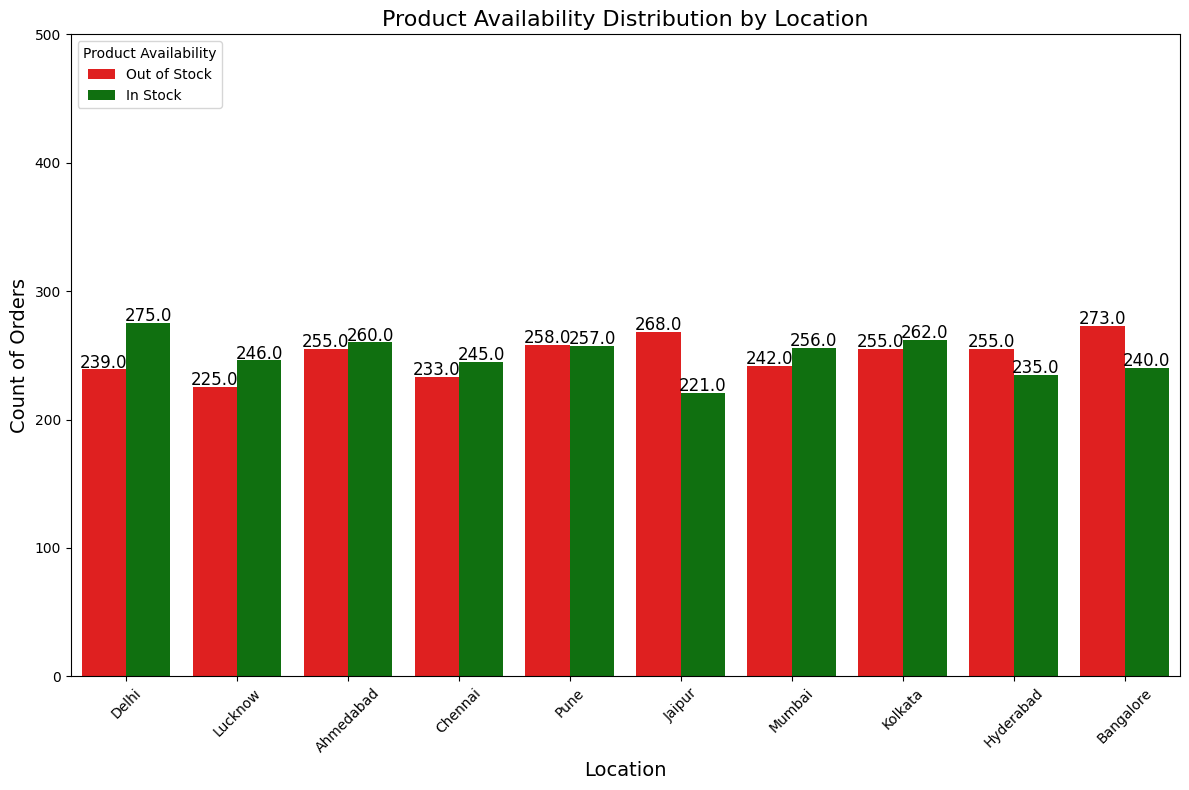

In [10]:

#4. Plotting Frequency Distribution for Product Availability by Location with count labels
plt.figure(figsize=(12, 8))
color_map = {'In Stock': 'green', 'Out of Stock': 'red'}
ax = sns.countplot(x='Location', hue='Product_Availability', data=df, palette=color_map)
#Labeling and aesthetics
plt.title('Product Availability Distribution by Location', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Count of Orders', fontsize=14)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
ax.set_ylim(0, 500)
plt.legend(title="Product Availability", loc='upper left')
plt.tight_layout()
plt.show()



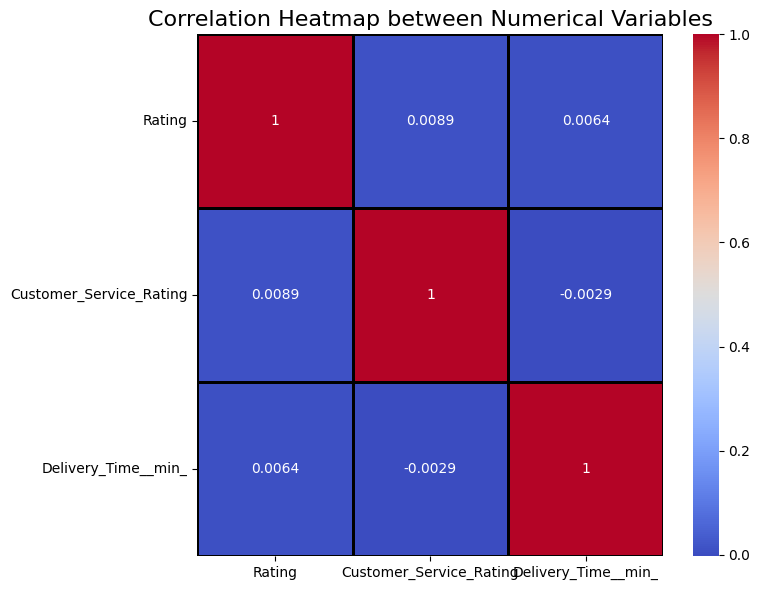

In [11]:
#5. Visualizing the correlation between numerical variables
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Rating', 'Customer_Service_Rating', 'Delivery_Time__min_']].corr(), annot=True, cmap='coolwarm', linewidths=1, linecolor='black')
# #Labeling and aesthetics
plt.title('Correlation Heatmap between Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()



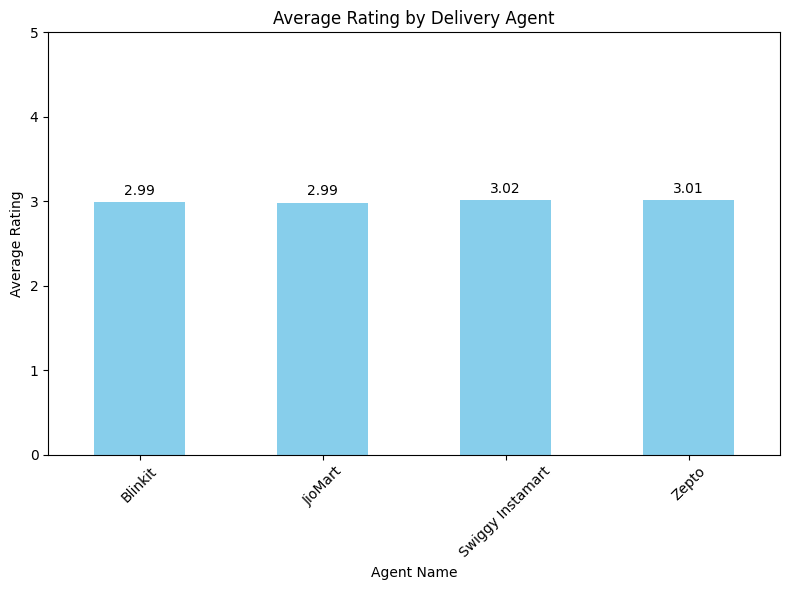

In [12]:
#6. Average Rating by Agent

# Calculate the average rating by agent
average_rating = df.groupby('Agent_Name')['Rating'].mean()
plt.figure(figsize=(8, 6))
ax = average_rating.plot(kind='bar', color='skyblue')

#Labeling and aesthetics
for i, v in enumerate(average_rating):
    ax.text(i, v + 0.05, round(v, 2), ha='center', va='bottom')
plt.ylim(0, 5)
plt.title('Average Rating by Delivery Agent')
plt.xlabel('Agent Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



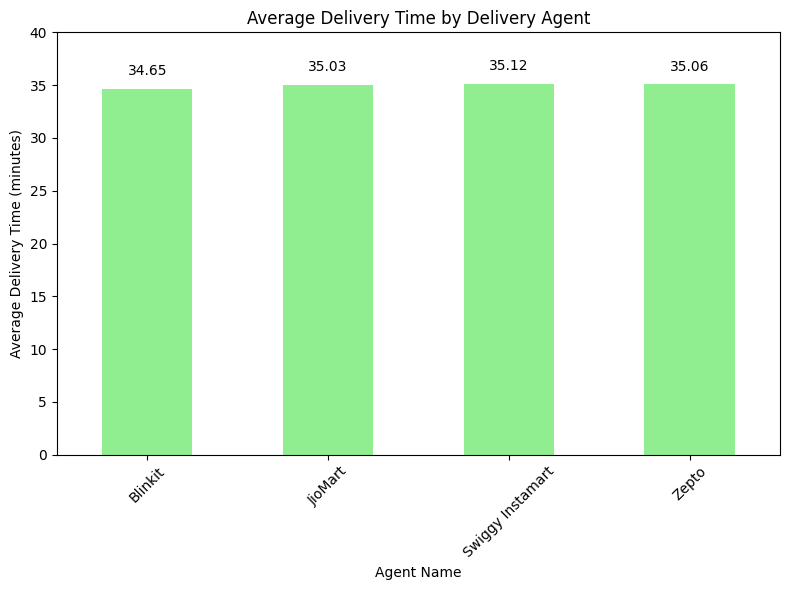

In [13]:
#7. Average Delivery Time by Agent

# Calculate the average delivery time by agent
average_delivery_time = df.groupby('Agent_Name')['Delivery_Time__min_'].mean()
plt.figure(figsize=(8, 6))
ax = average_delivery_time.plot(kind='bar', color='lightgreen')

#Labeling and aesthetics
for i, v in enumerate(average_delivery_time):
    ax.text(i, v + 1, round(v, 2), ha='center', va='bottom')
plt.title('Average Delivery Time by Delivery Agent')
plt.xlabel('Agent Name')
plt.ylabel('Average Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.ylim(0, 40)
plt.tight_layout()
plt.show()


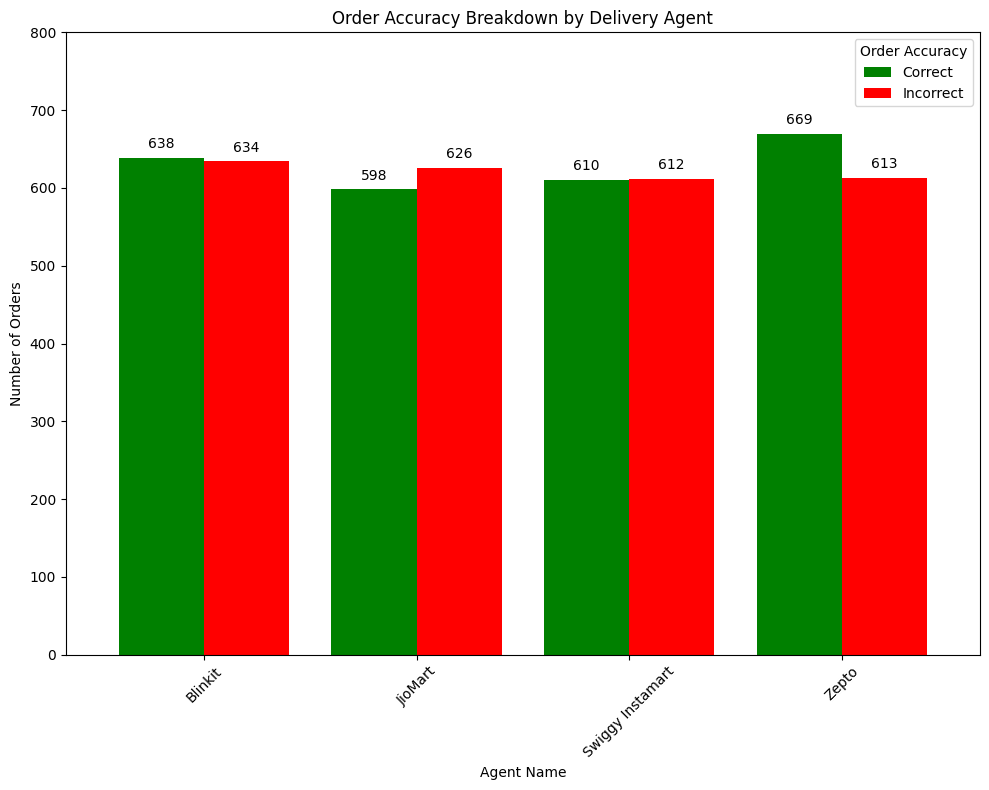

In [14]:

#8.Order Accuracy Breakdown Agent wise

# Count the number of correct and incorrect orders for each agent and Plotting the order accuracy breakdown by agent
order_accuracy = df.groupby(['Agent_Name', 'Order_Accuracy']).size().unstack(fill_value=0)
ax = order_accuracy.plot(kind='bar', figsize=(10, 8), color=['green', 'red'], width=0.8)
#Labeling and aesthetics
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                xytext=(0, 5),  # Text position
                textcoords='offset points',
                ha='center', va='bottom')

plt.title('Order Accuracy Breakdown by Delivery Agent')
plt.xlabel('Agent Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.ylim(0, 800)
plt.legend(title="Order Accuracy", loc='upper right')
plt.tight_layout()
plt.show()

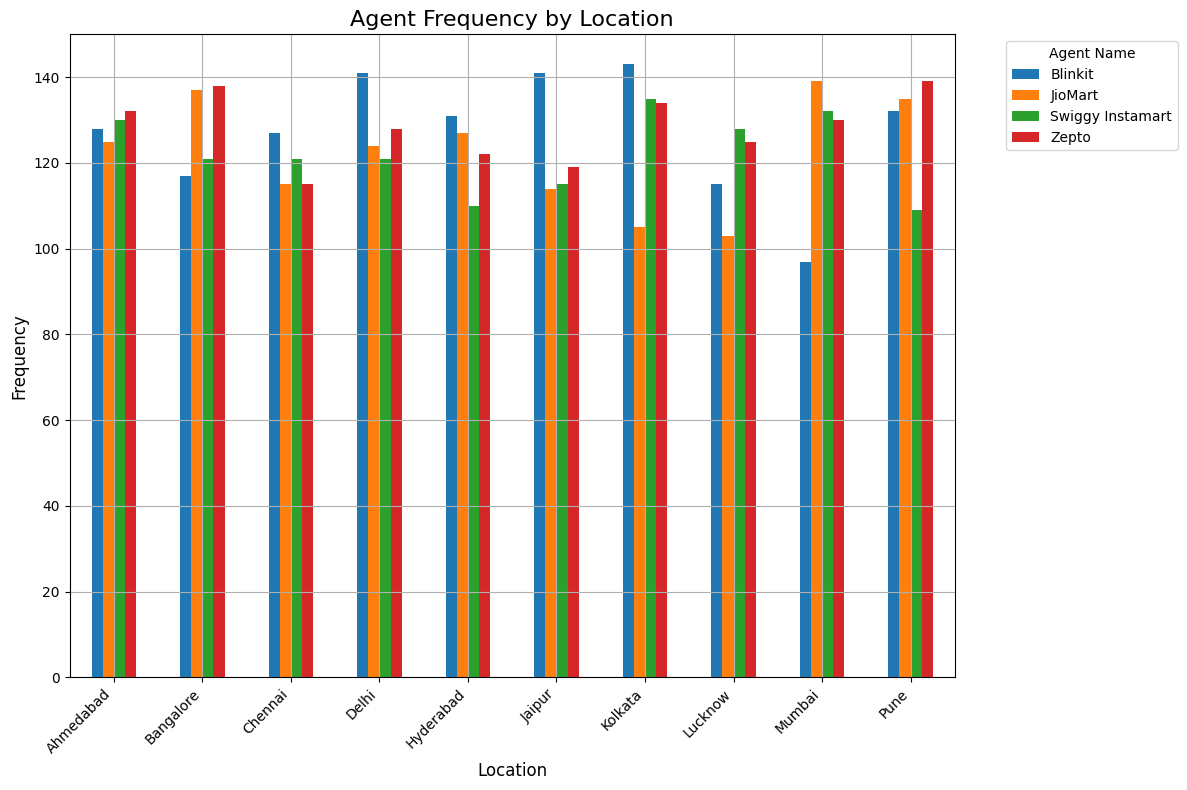

In [15]:
#9.Location and Agent Name to get the frequency
# Group by Location and Agent Name to get the frequency
frequency_data = df.groupby(['Location', 'Agent_Name']).size().reset_index(name='Frequency')
sorted_frequency_data = frequency_data.sort_values(by=['Location', 'Frequency'], ascending=[True, False])
pivot_data = sorted_frequency_data.pivot_table(index='Location', columns='Agent_Name', values='Frequency', fill_value=0)

# Plotting the data
ax = pivot_data.plot(kind='bar', stacked=False, figsize=(12, 8))

# Customizing plot appearance
plt.title('Agent Frequency by Location', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.ylim(0, 150)  # Adjust the y-axis limit if needed
plt.legend(title='Agent Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Null Hypothesis (H0): There is no significant relationship between Order Type and Product Availability.
Alternative Hypothesis (H1): There is a significant relationship between Order Type and Product Availability.
Chi-Square Statistic: 2.277905917901016
P-value: 0.6847944757318052
Fail to reject the null hypothesis: There is no significant relationship between Order Type and Product Availability.


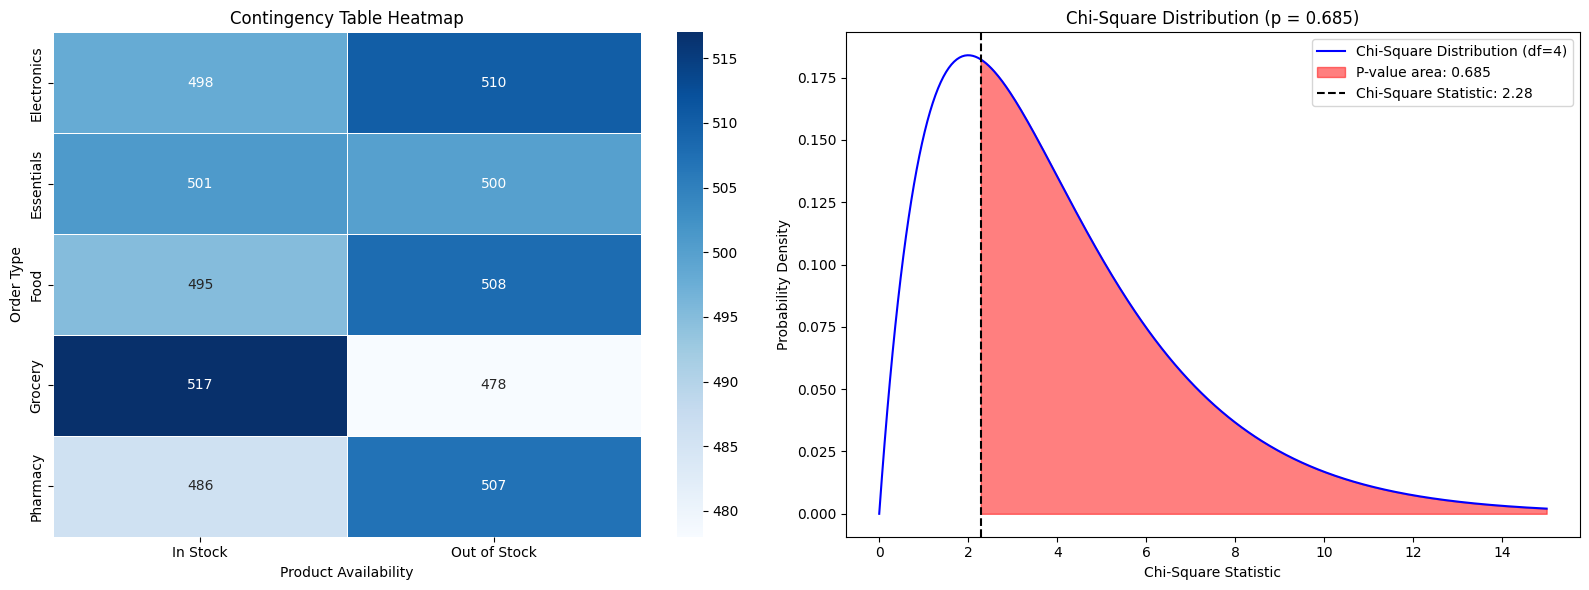

In [16]:
"""......................................Inferential Data Analysis..................................................."""
#1.Chi-Square Test for Independence to test whether there is an association between Order Type and Product Availability
# Create a contingency table for Order Type and Product Availability
contingency_table = pd.crosstab(df['Order_Type'], df['Product_Availability'])

# Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
alpha = 0.05

# Display the hypotheses
print("Null Hypothesis (H0): There is no significant relationship between Order Type and Product Availability.")
print("Alternative Hypothesis (H1): There is a significant relationship between Order Type and Product Availability.")

# Display Chi-Square Statistic and p-value
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Interpretation of the results based on the p-value
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between Order Type and Product Availability.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Order Type and Product Availability.")

# Create subplots: 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Contingency Table Heatmap
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues", cbar=True, linewidths=0.5, ax=axs[0])
axs[0].set_title("Contingency Table Heatmap")
axs[0].set_xlabel("Product Availability")
axs[0].set_ylabel("Order Type")

# Subplot 2: Chi-Square Distribution Plot
x = np.linspace(0, 15, 500)
axs[1].plot(x, chi2.pdf(x, dof), label=f'Chi-Square Distribution (df={dof})', color='blue')

# Shade the area representing the p-value
x_fill = np.linspace(chi2_stat, 15, 500)  # Area to the right of the chi2_stat
axs[1].fill_between(x_fill, chi2.pdf(x_fill, dof), color='red', alpha=0.5, label=f'P-value area: {p_value:.3f}')

# Add labels and title
axs[1].set_title(f'Chi-Square Distribution (p = {p_value:.3f})')
axs[1].set_xlabel('Chi-Square Statistic')
axs[1].set_ylabel('Probability Density')
axs[1].axvline(x=chi2_stat, color='black', linestyle='--', label=f'Chi-Square Statistic: {chi2_stat:.2f}')
axs[1].legend()
plt.tight_layout()
plt.show()


Null Hypothesis (H₀): There is no significant difference in Customer Service Ratings across the different Order Types.
Alternative Hypothesis (H₁): There is a significant difference in Customer Service Ratings across the different Order Types.
Kruskal-Wallis H-test statistic: 1.1656302785848227
P-value: 0.8837242990170768
Fail to reject the null hypothesis: There is no significant difference in Customer Service Ratings across the different Order Types.


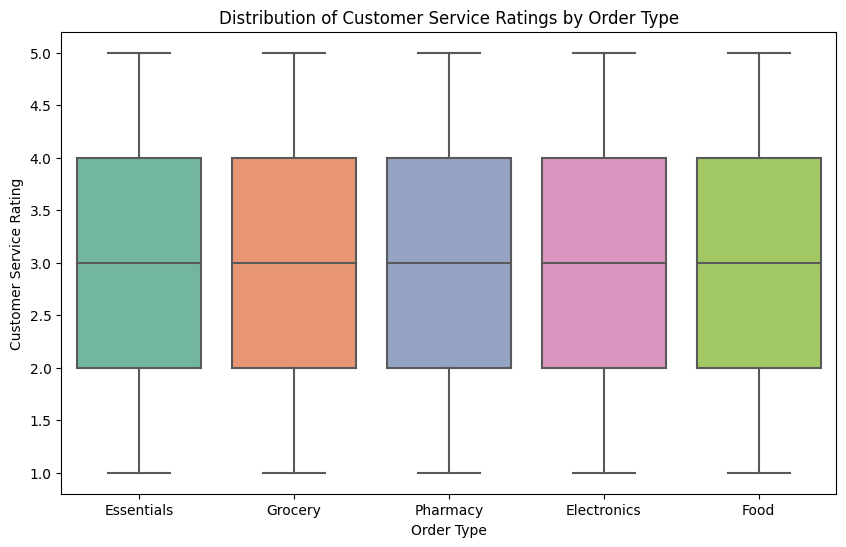

In [17]:

#2.Non-Parametric Kruskal-Wallis H-test to check significant difference between the Customer Service Ratings across Order Types.

# Group the data by Order Type and extract the Customer Service Ratings
order_types = df['Order_Type'].unique()
grouped_data = [df[df['Order_Type'] == order_type]['Customer_Service_Rating'] for order_type in order_types]

# Perform Kruskal-Wallis H-test
kruskal_stat, p_value = stats.kruskal(*grouped_data)

# Display Kruskal-Wallis Test Results
print("Null Hypothesis (H₀): There is no significant difference in Customer Service Ratings across the different Order Types.")
print("Alternative Hypothesis (H₁): There is a significant difference in Customer Service Ratings across the different Order Types.")
print(f"Kruskal-Wallis H-test statistic: {kruskal_stat}")
print(f"P-value: {p_value}")

# Interpretation of the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in Customer Service Ratings across the different Order Types.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in Customer Service Ratings across the different Order Types.")

# Create a boxplot to visualize the distribution of Customer Service Ratings across Order Types
plt.figure(figsize=(10, 6))
sns.boxplot(x='Order_Type', y='Customer_Service_Rating', data=df, palette='Set2')
plt.title('Distribution of Customer Service Ratings by Order Type')
plt.xlabel('Order Type')
plt.ylabel('Customer Service Rating')
plt.show()

Null Hypothesis (H₀): There is no significant association between Discount Applied and Customer Feedback Type.
Alternative Hypothesis (H₁): There is a significant association between Discount Applied and Customer Feedback Type.
Chi-Square Statistic: 0.30757433117971655
P-value: 0.8574544974143203
Fail to reject the null hypothesis: There is no significant association between Discount Applied and Customer Feedback Type.


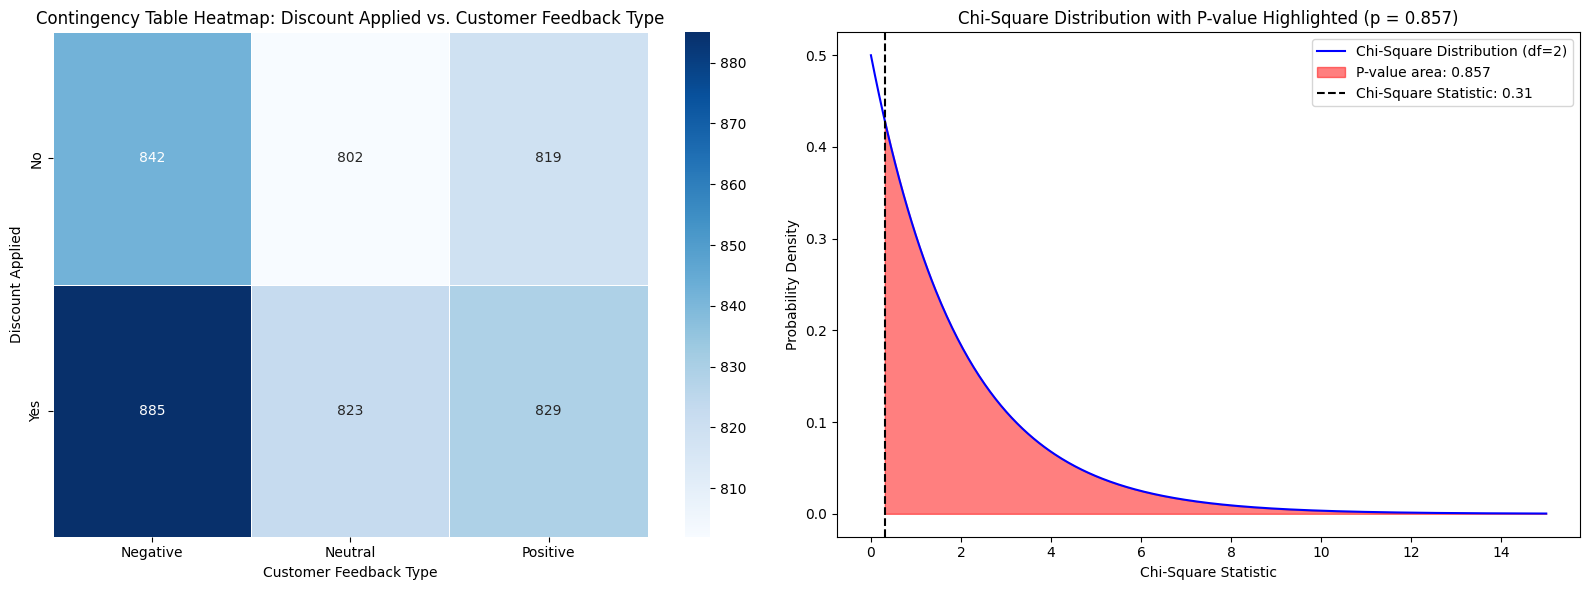

In [18]:

#3.Chi-Square Test for Independence to test whether there is an association between Discount Applied and Customer Feedback Type.
# Create a contingency table for Discount Applied vs Customer Feedback Type
contingency_table = pd.crosstab(df['Discount_Applied'], df['Customer_Feedback_Type'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
alpha = 0.05

# Display hypotheses
print("Null Hypothesis (H₀): There is no significant association between Discount Applied and Customer Feedback Type.")
print("Alternative Hypothesis (H₁): There is a significant association between Discount Applied and Customer Feedback Type.")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Interpretation of the results
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between Discount Applied and Customer Feedback Type.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between Discount Applied and Customer Feedback Type.")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Create a figure with 1 row and 2 columns

# Contingency Table Heatmap
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues", cbar=True, linewidths=0.5, ax=axes[0])
axes[0].set_title("Contingency Table Heatmap: Discount Applied vs. Customer Feedback Type")
axes[0].set_xlabel("Customer Feedback Type")
axes[0].set_ylabel("Discount Applied")

# Chi-Square Distribution Plot
x = np.linspace(0, 15, 500)  # Chi-Square distribution values range
axes[1].plot(x, chi2.pdf(x, dof), label=f'Chi-Square Distribution (df={dof})', color='blue')

# Shade the area representing the p-value
x_fill = np.linspace(chi2_stat, 15, 500)  # Area to the right of the chi2_stat
axes[1].fill_between(x_fill, chi2.pdf(x_fill, dof), color='red', alpha=0.5, label=f'P-value area: {p_value:.3f}')
axes[1].axvline(x=chi2_stat, color='black', linestyle='--', label=f'Chi-Square Statistic: {chi2_stat:.2f}')
axes[1].set_title(f'Chi-Square Distribution with P-value Highlighted (p = {p_value:.3f})')
axes[1].set_xlabel('Chi-Square Statistic')
axes[1].set_ylabel('Probability Density')
axes[1].legend()
plt.tight_layout()
plt.show()

Null Hypothesis (H₀) for Agent Name: There is no significant effect of Agent Name on Customer Service Rating.
Alternative Hypothesis (H₁) for Agent Name: There is a significant effect of Agent Name on Customer Service Rating.

Null Hypothesis (H₀) for Location: There is no significant effect of Location on Customer Service Rating.
Alternative Hypothesis (H₁) for Location: There is a significant effect of Location on Customer Service Rating.

Null Hypothesis (H₀) for the Interaction effect: There is no significant interaction effect between Agent Name and Location on Customer Service Rating.
Alternative Hypothesis (H₁) for the Interaction effect: There is a significant interaction effect between Agent Name and Location on Customer Service Rating.
Two-Way ANOVA Table:
                                sum_sq      df         F    PR(>F)
C(Agent_Name)                 3.907292     3.0  0.656473  0.578818
C(Location)                  41.352328     9.0  2.315900  0.013502
C(Agent_Name):C(Locati

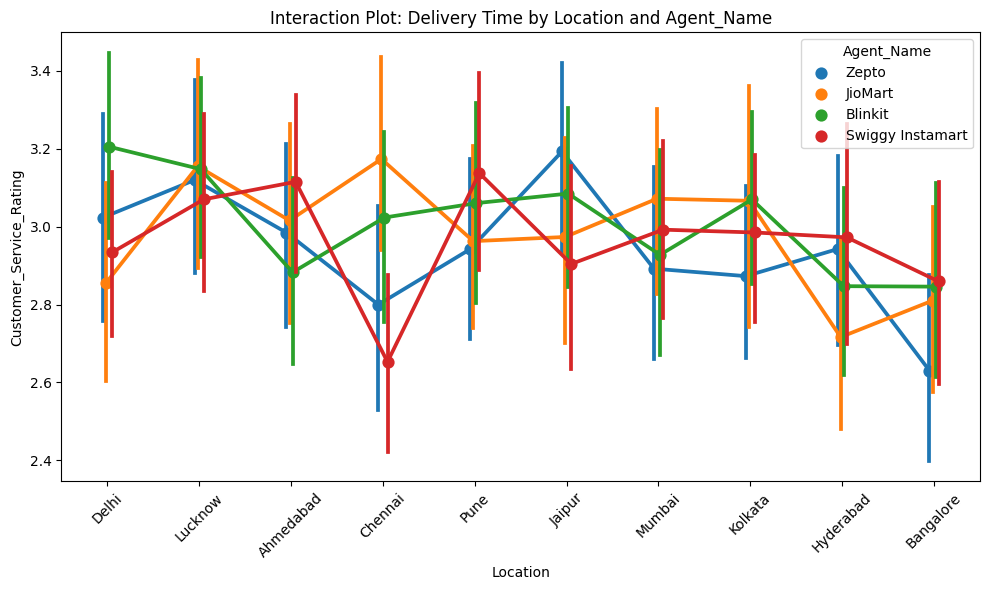

In [19]:

# 4.Two-way ANOVA to examine how both the Agent Name and Location affect Customer Service Rating, including the interaction effect.

# Fit the OLS model using the formula
formula = 'Customer_Service_Rating ~ C(Agent_Name) + C(Location) + C(Agent_Name):C(Location)'
model = ols(formula, data=df).fit()
# Hypothesis Statements
print("Null Hypothesis (H₀) for Agent Name: There is no significant effect of Agent Name on Customer Service Rating.")
print("Alternative Hypothesis (H₁) for Agent Name: There is a significant effect of Agent Name on Customer Service Rating.")

print("\nNull Hypothesis (H₀) for Location: There is no significant effect of Location on Customer Service Rating.")
print("Alternative Hypothesis (H₁) for Location: There is a significant effect of Location on Customer Service Rating.")

print("\nNull Hypothesis (H₀) for the Interaction effect: There is no significant interaction effect between Agent Name and Location on Customer Service Rating.")
print("Alternative Hypothesis (H₁) for the Interaction effect: There is a significant interaction effect between Agent Name and Location on Customer Service Rating.")

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print("Two-Way ANOVA Table:")
print(anova_table)

# Interpretation of Results with p-values
alpha = 0.05
if anova_table["PR(>F)"]["C(Agent_Name)"] < alpha:
    print("\nReject the null hypothesis for Agent Name: There is a significant effect of Agent Name on Customer Service Rating.")
else:
    print("\nFail to reject the null hypothesis for Agent Name: There is no significant effect of Agent Name on Customer Service Rating.")

if anova_table["PR(>F)"]["C(Location)"] < alpha:
    print("Reject the null hypothesis for Location: There is a significant effect of Location on Customer Service Rating.")
else:
    print("Fail to reject the null hypothesis for Location: There is no significant effect of Location on Customer Service Rating.")

if anova_table["PR(>F)"]["C(Agent_Name):C(Location)"] < alpha:
    print("Reject the null hypothesis for the interaction effect: There is a significant interaction effect between Agent Name and Location.")
else:
    print("Fail to reject the null hypothesis for the interaction effect: There is no significant interaction effect between Agent Name and Location.")

# Interaction Plot using seaborn
plt.figure(figsize=(10, 6))
sns.pointplot(x='Location', y='Customer_Service_Rating', hue='Agent_Name', data=df, markers='o', linestyles='-', dodge=True)
plt.title('Interaction Plot: Delivery Time by Location and Agent_Name')
plt.xlabel('Location')
plt.ylabel('Customer_Service_Rating')
plt.xticks(rotation=45)
plt.legend(title="Agent_Name", loc='upper right')
plt.tight_layout()
plt.show()



Chi-Square Test for Price Range vs Location:
Chi-Square Statistic: 10.481389925168623
p-value: 0.9150557801067793
Expected Frequencies Table: 
[[174.688  174.0096 162.1376 174.3488 166.208  165.8688 175.3664 159.7632
  168.9216 174.688 ]
 [173.04   172.368  160.608  172.704  164.64   164.304  173.712  158.256
  167.328  173.04  ]
 [167.272  166.6224 155.2544 166.9472 159.152  158.8272 167.9216 152.9808
  161.7504 167.272 ]]

Null Hypothesis (H0): There is no significant relationship between Price Range and Location.
Alternative Hypothesis (H1): There is a significant relationship between Price Range and Location.

Fail to reject the null hypothesis: There is no significant relationship between Price Range and Location.


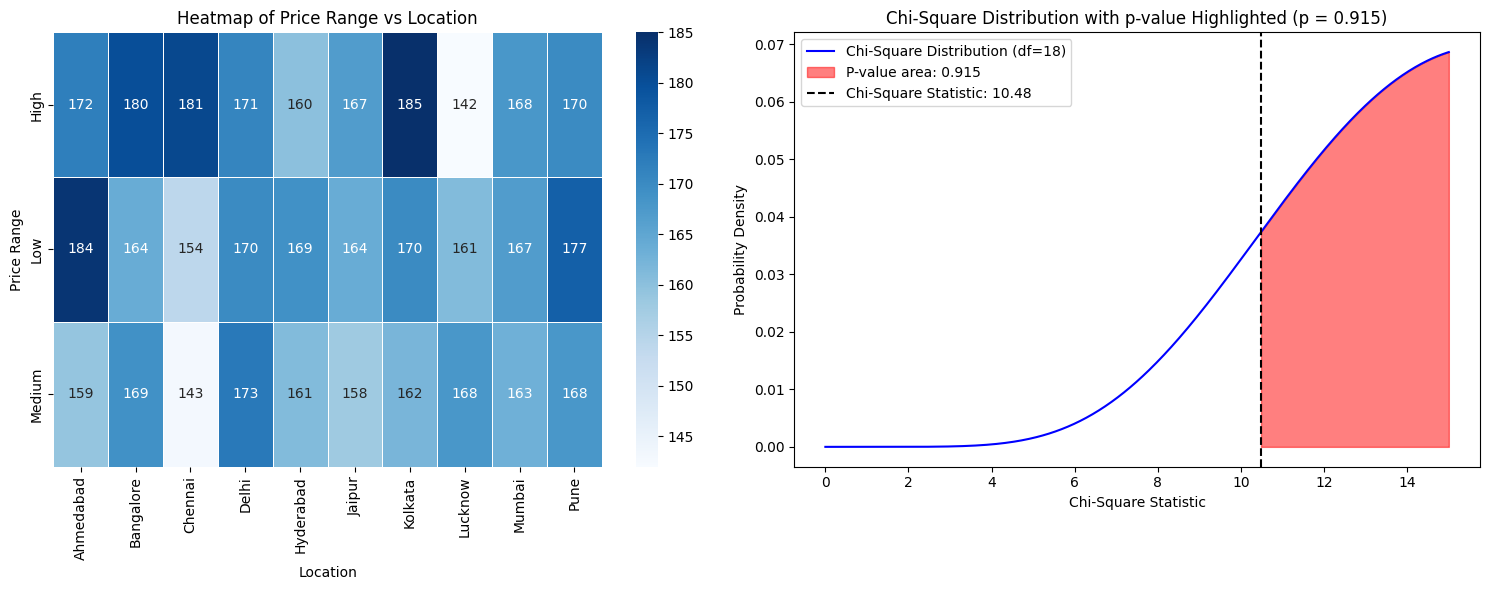

In [20]:
#5.Chi-Square Test of Independence for Price Range vs Location

# Create a contingency table for Price Range vs Location
contingency_table_location = pd.crosstab(df['Price_Range'], df['Location'])

# Perform Chi-Square test
chi2_stat_location, p_value_location, dof_location, expected_location = chi2_contingency(contingency_table_location)

# Print Chi-Square Test Results
print("\nChi-Square Test for Price Range vs Location:")
print(f"Chi-Square Statistic: {chi2_stat_location}")
print(f"p-value: {p_value_location}")
print(f"Expected Frequencies Table: \n{expected_location}")
print("\nNull Hypothesis (H0): There is no significant relationship between Price Range and Location.")
print("Alternative Hypothesis (H1): There is a significant relationship between Price Range and Location.")

# Interpretation of result with p-value
alpha = 0.05
if p_value_location < alpha:
    print("\nReject the null hypothesis: There is a significant relationship between Price Range and Location.")
else:
    print("\nFail to reject the null hypothesis: There is no significant relationship between Price Range and Location.")

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Contingency Table Heatmap Plot
sns.heatmap(contingency_table_location, annot=True, cmap='Blues', fmt='d', linewidths=0.5, ax=axes[0])
axes[0].set_title('Heatmap of Price Range vs Location')
axes[0].set_xlabel('Location')
axes[0].set_ylabel('Price Range')

# Chi-Square Distribution Plot
x = np.linspace(0, 15, 500)
axes[1].plot(x, chi2.pdf(x, dof_location), label=f'Chi-Square Distribution (df={dof_location})', color='blue')

# Shade the area representing the p-value
x_fill = np.linspace(chi2_stat_location, 15, 500)  # Area to the right of the chi2_stat
axes[1].fill_between(x_fill, chi2.pdf(x_fill, dof_location), color='red', alpha=0.5, label=f'P-value area: {p_value_location:.3f}')

# Add labels and title for the Chi-Square plot
axes[1].set_title(f'Chi-Square Distribution with p-value Highlighted (p = {p_value_location:.3f})')
axes[1].set_xlabel('Chi-Square Statistic')
axes[1].set_ylabel('Probability Density')
axes[1].axvline(x=chi2_stat_location, color='black', linestyle='--', label=f'Chi-Square Statistic: {chi2_stat_location:.2f}')
axes[1].legend()
plt.tight_layout()
plt.show()



Chi-Square Test for Price Range vs Order Type:
Chi-Square Statistic: 16.584887929417363
p-value: 0.034733866559285516
Degrees of Freedom: 8
Expected Frequencies Table: 
[[341.9136 339.5392 340.2176 337.504  336.8256]
 [338.688  336.336  337.008  334.32   333.648 ]
 [327.3984 325.1248 325.7744 323.176  322.5264]]

Null Hypothesis (H0): There is no significant relationship between Price Range and Order Type.
Alternative Hypothesis (H1): There is a significant relationship between Price Range and Order Type.

Reject the null hypothesis: There is a significant relationship between Price Range and Order Type.


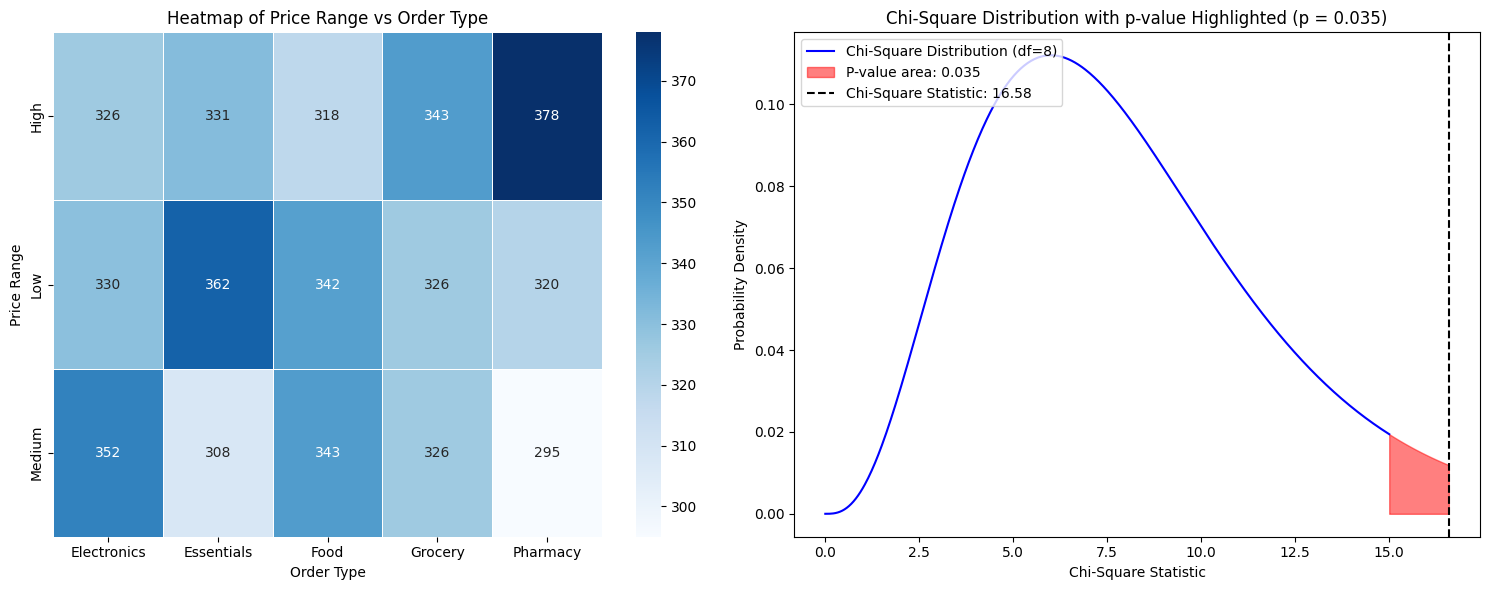

In [21]:

# 6.Chi-Square Test of Independence for Price Range vs Order Type

# Create the contingency table for Price Range vs Order Type
contingency_table_order_type = pd.crosstab(df['Price_Range'], df['Order_Type'])

# Perform the Chi-Square test
chi2_stat_order_type, p_value_order_type, dof_order_type, expected_order_type = chi2_contingency(contingency_table_order_type)

# Print Chi-Square Test Results
print("\nChi-Square Test for Price Range vs Order Type:")
print(f"Chi-Square Statistic: {chi2_stat_order_type}")
print(f"p-value: {p_value_order_type}")
print(f"Degrees of Freedom: {dof_order_type}")
print(f"Expected Frequencies Table: \n{expected_order_type}")
print("\nNull Hypothesis (H0): There is no significant relationship between Price Range and Order Type.")
print("Alternative Hypothesis (H1): There is a significant relationship between Price Range and Order Type.")

# Interpretation of p-value
alpha = 0.05
if p_value_order_type < alpha:
    print("\nReject the null hypothesis: There is a significant relationship between Price Range and Order Type.")
else:
    print("\nFail to reject the null hypothesis: There is no significant relationship between Price Range and Order Type.")

# Set up the subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Contingency Table Heatmap Plot
sns.heatmap(contingency_table_order_type, annot=True, cmap='Blues', fmt='d', linewidths=0.5, ax=axes[0])
axes[0].set_title('Heatmap of Price Range vs Order Type')
axes[0].set_xlabel('Order Type')
axes[0].set_ylabel('Price Range')

# Chi-Square Distribution Plot
x = np.linspace(0, 15, 500)
axes[1].plot(x, chi2.pdf(x, dof_order_type), label=f'Chi-Square Distribution (df={dof_order_type})', color='blue')
x_fill = np.linspace(chi2_stat_order_type, 15, 500)
axes[1].fill_between(x_fill, chi2.pdf(x_fill, dof_order_type), color='red', alpha=0.5, label=f'P-value area: {p_value_order_type:.3f}')

# Add labels and title for the Chi-Square plot
axes[1].set_title(f'Chi-Square Distribution with p-value Highlighted (p = {p_value_order_type:.3f})')
axes[1].set_xlabel('Chi-Square Statistic')
axes[1].set_ylabel('Probability Density')
axes[1].axvline(x=chi2_stat_order_type, color='black', linestyle='--', label=f'Chi-Square Statistic: {chi2_stat_order_type:.2f}')
axes[1].legend(loc='upper left')
plt.tight_layout()
plt.show()

                                 sum_sq      df         F    PR(>F)
C(Location)                1.341795e+03     9.0  0.683430  0.724676
C(Order_Type)              8.586729e+02     4.0  0.984051  0.414814
C(Location):C(Order_Type)  1.143546e+04    36.0  1.456133  0.038539
Residual                   1.079830e+06  4950.0       NaN       NaN

Null Hypothesis (H₀) for Location: There is no significant effect of Location on Delivery Time.
Alternative Hypothesis (H₁) for Location: There is a significant effect of Location on Delivery Time.

Null Hypothesis (H₀) for Order Type: There is no significant effect of Order Type on Delivery Time.
Alternative Hypothesis (H₁) for Order Type: There is a significant effect of Order Type on Delivery Time.

Null Hypothesis (H₀) for the Interaction effect: There is no significant interaction effect between Location and Order Type on Delivery Time.
Alternative Hypothesis (H₁) for the Interaction effect: There is a significant interaction effect between Locat

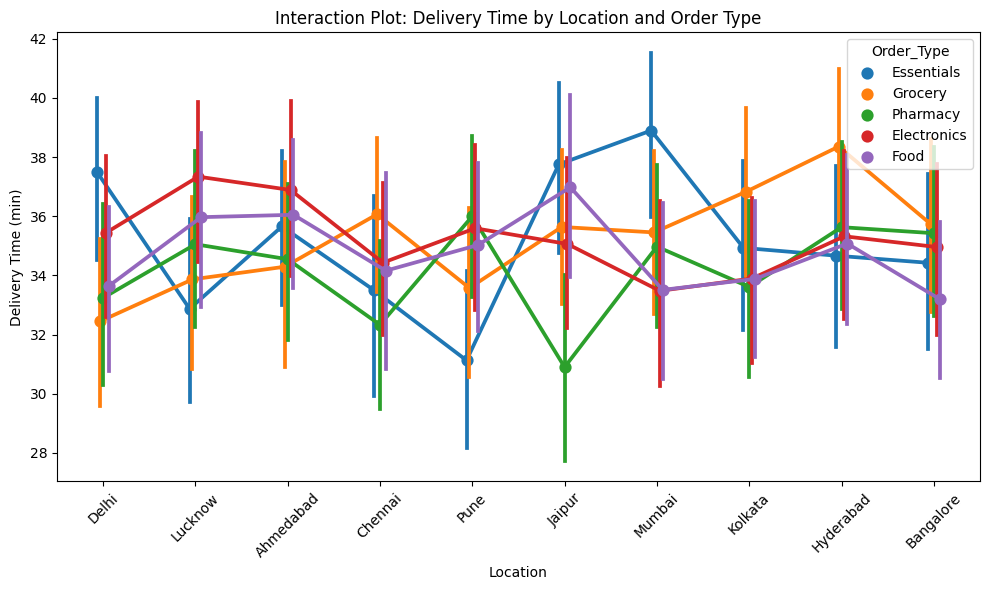

In [22]:
# 7.Two-Way ANOVA to Compare Delivery Time differs by Location and Order Type

# Two-Way ANOVA formula
formula = 'Delivery_Time__min_ ~ C(Location) + C(Order_Type) + C(Location):C(Order_Type)'
model = ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

# Hypothesis Statements
print("\nNull Hypothesis (H₀) for Location: There is no significant effect of Location on Delivery Time.")
print("Alternative Hypothesis (H₁) for Location: There is a significant effect of Location on Delivery Time.")

print("\nNull Hypothesis (H₀) for Order Type: There is no significant effect of Order Type on Delivery Time.")
print("Alternative Hypothesis (H₁) for Order Type: There is a significant effect of Order Type on Delivery Time.")

print("\nNull Hypothesis (H₀) for the Interaction effect: There is no significant interaction effect between Location and Order Type on Delivery Time.")
print("Alternative Hypothesis (H₁) for the Interaction effect: There is a significant interaction effect between Location and Order Type on Delivery Time.")

# Interpretation of p-values
alpha = 0.05
if anova_table["PR(>F)"]["C(Location)"] < alpha:
    print("Reject the null hypothesis for Location: There is a significant effect of Location on Delivery Time.")
else:
    print("Fail to reject the null hypothesis for Location: There is no significant effect of Location on Delivery Time.")

if anova_table["PR(>F)"]["C(Order_Type)"] < alpha:
    print("Reject the null hypothesis for Order Type: There is a significant effect of Order Type on Delivery Time.")
else:
    print("Fail to reject the null hypothesis for Order Type: There is no significant effect of Order Type on Delivery Time.")

if anova_table["PR(>F)"]["C(Location):C(Order_Type)"] < alpha:
    print("Reject the null hypothesis for the interaction effect: There is a significant interaction effect between Location and Order Type on Delivery Time.")
else:
    print("Fail to reject the null hypothesis for the interaction effect: There is no significant interaction effect between Location and Order Type on Delivery Time.")

# Interaction Plot using seaborn
plt.figure(figsize=(10, 6))
sns.pointplot(x='Location', y='Delivery_Time__min_', hue='Order_Type', data=df, markers='o', linestyles='-', dodge=True)
plt.title('Interaction Plot: Delivery Time by Location and Order Type')
plt.xlabel('Location')
plt.ylabel('Delivery Time (min)')
plt.xticks(rotation=45)
plt.legend(title="Order_Type", loc='upper right')
plt.tight_layout()
plt.show()

In [23]:
""".....................................NLP (Natural Language Processing)..........................................."""
# Importing the necessary NLP libraries
# Library for sentiment analysis
from textblob import TextBlob
# For converting text to a vector of word counts
from sklearn.feature_extraction.text import CountVectorizer
 # For calculating similarity between vectors
from sklearn.metrics.pairwise import cosine_similarity
# For converting text to TF-IDF vectors
from sklearn.feature_extraction.text import TfidfVectorizer
# For generating word clouds
from wordcloud import WordCloud
# Regular expressions for text cleaning
import re
# Stopword removal utility from NLTK
from nltk.corpus import stopwords
# General NLP library
import nltk


Customer_Feedback_Type  Negative  Neutral  Positive
Sentiment                                          
Negative                     365      318       322
Neutral                      512      508       543
Positive                     850      799       783

Hypothesis Test:
Null Hypothesis (H₀): There is no significant association between Sentiment analysis and Customer Feedback Type.
Alternative Hypothesis (H₁): There is a significant association between Sentiment analysis and Customer Feedback Type.

Chi-Square Test Result:
Chi2 Statistic: 4.991257969558903
p-value: 0.28819565892326143
Degrees of Freedom: 4
Expected Frequencies Table:
[[347.127  326.625  331.248 ]
 [539.8602 507.975  515.1648]
 [840.0128 790.4    801.5872]]

Fail to reject the null hypothesis: There is no significant association between Sentiment analysis and Customer Feedback Type.


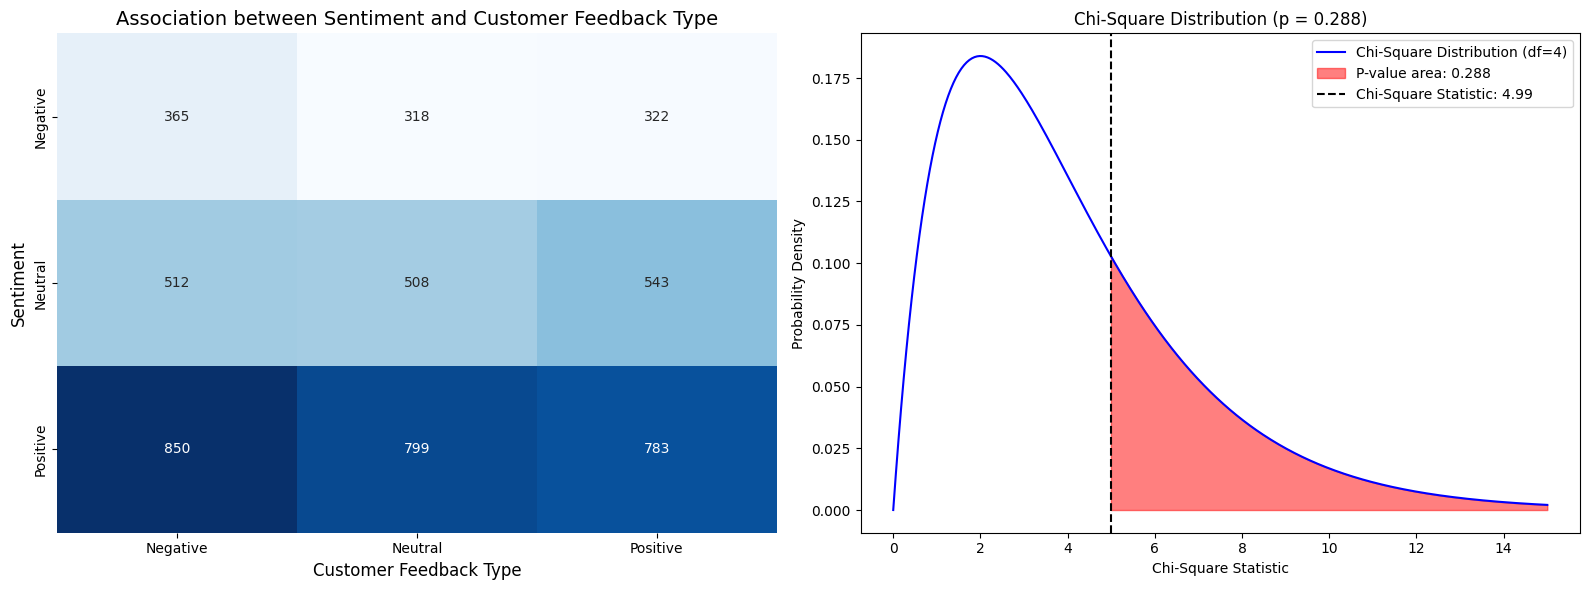

In [24]:
# 1.Sentiment analysis on the Review Text and then determine if there is a correlation between Sentiment and Customer Feedback Type,

# Function to analyze sentiment
def analyze_sentiment(review):
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis to the 'Review_Text' column
df['Sentiment'] = df['Review_Text'].apply(analyze_sentiment)

# Create a cross-tabulation between 'Sentiment' and 'Customer_Feedback_Type'
sentiment_feedback_crosstab = pd.crosstab(df['Sentiment'], df['Customer_Feedback_Type'])

# Display the cross-tabulation (contingency table)
print(sentiment_feedback_crosstab)

# Plot a heatmap to visualize the association between Sentiment and Customer Feedback Type
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Create a figure with 1 row and 2 columns
sns.heatmap(sentiment_feedback_crosstab, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])

# Customize the plot with labels and title for heatmap
axes[0].set_title('Association between Sentiment and Customer Feedback Type', fontsize=14)
axes[0].set_xlabel('Customer Feedback Type', fontsize=12)
axes[0].set_ylabel('Sentiment', fontsize=12)

# Perform Chi-Square Test of Independence
chi2_stat, p, dof, expected = chi2_contingency(sentiment_feedback_crosstab)

# Hypothesis Framing
print("\nHypothesis Test:")
print("Null Hypothesis (H₀): There is no significant association between Sentiment analysis and Customer Feedback Type.")
print("Alternative Hypothesis (H₁): There is a significant association between Sentiment analysis and Customer Feedback Type.")
print("\nChi-Square Test Result:")
print("Chi2 Statistic:", chi2_stat)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

# If p-value is less than 0.05, there is a statistically significant association
if p < 0.05:
    print("\nReject the null hypothesis: There is a significant association between Sentiment analysis and Customer Feedback Type.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between Sentiment analysis and Customer Feedback Type.")

# Subplot 2: Chi-Square Distribution Plot
# Use chi-square distribution for plotting
x = np.linspace(0, 15, 500)

# Plot the chi-square distribution
axes[1].plot(x, chi2.pdf(x, dof), label=f'Chi-Square Distribution (df={dof})', color='blue')

# Shade the area representing the p-value (right tail)
x_fill = np.linspace(chi2.ppf(1-p, dof), 15, 500)  # Area to the right of the chi2_stat
axes[1].fill_between(x_fill, chi2.pdf(x_fill, dof), color='red', alpha=0.5, label=f'P-value area: {p:.3f}')

# Add labels and title for chi-square plot
axes[1].set_title(f'Chi-Square Distribution (p = {p:.3f})')
axes[1].set_xlabel('Chi-Square Statistic')
axes[1].set_ylabel('Probability Density')
axes[1].axvline(x=chi2.ppf(1-p, dof), color='black', linestyle='--', label=f'Chi-Square Statistic: {chi2.ppf(1-p, dof):.2f}')
axes[1].legend()
plt.tight_layout()
plt.show()

In [25]:
#2.Cosine Similarity between Sentiment analysis of review text and Customer Feedback Type:

# Convert the 'Sentiment' and 'Customer_Feedback_Type' columns to a format that cosine similarity can use
df['Sentiment'] = df['Sentiment'].astype(str)
df['Customer_Feedback_Type'] = df['Customer_Feedback_Type'].astype(str)
vectorizer = CountVectorizer()

# Transform 'Sentiment' and 'Customer_Feedback_Type' columns into vectors
sentiment_vector = vectorizer.fit_transform(df['Sentiment'])
feedback_vector = vectorizer.transform(df['Customer_Feedback_Type'])

# Compute Cosine Similarity between the vectors of Sentiment and Customer_Feedback_Type
cosine_sim = cosine_similarity(sentiment_vector, feedback_vector)

# Output the cosine similarity
print("Cosine Similarity between Sentiment and Customer Feedback Type:")
print(cosine_sim)

# Compute an overall cosine similarity score (mean of all individual cosine similarities)
mean_cosine_sim = np.mean(cosine_sim)
print(f"\nMean Cosine Similarity: {mean_cosine_sim}")
if mean_cosine_sim < 0.5:
    print("\nLow Similarity: A mean similarity of 0.33 suggests that there isn't a strong direct relationship between the sentiment expressed in the reviews and the type of customer feedback. In other words, the sentiment might not always align with the feedback type, and the two columns may be driven by different factors.")
else:
    print("\nHigher Similarity: The mean similarity is higher than expected, suggesting that sentiment and customer feedback might be more aligned.")


Cosine Similarity between Sentiment and Customer Feedback Type:
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 0. 1.]]

Mean Cosine Similarity: 0.33133784

Low Similarity: A mean similarity of 0.33 suggests that there isn't a strong direct relationship between the sentiment expressed in the reviews and the type of customer feedback. In other words, the sentiment might not always align with the feedback type, and the two columns may be driven by different factors.


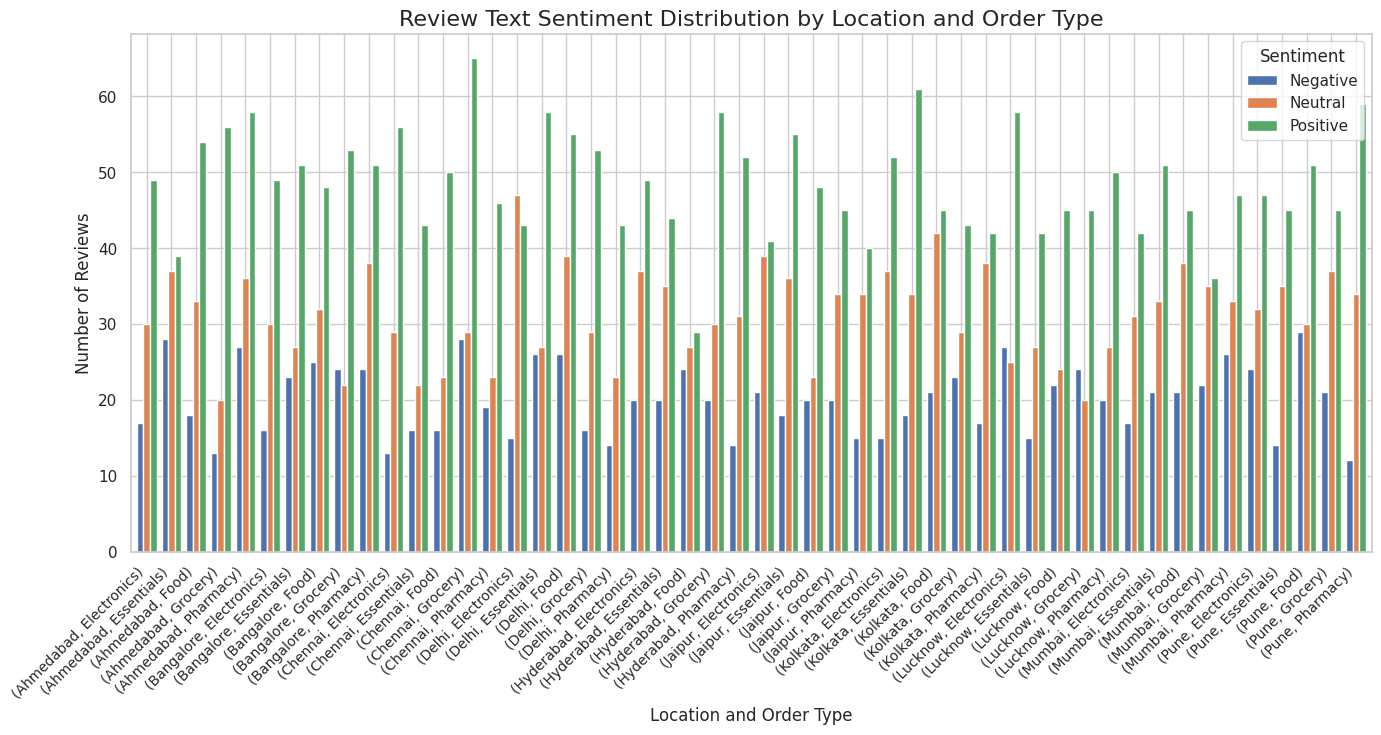

In [26]:
#3.To analyze Review text sentiment distribution by Location and Order Type
# Group by Location, Order Type, and Sentiment, and count the occurrences
sentiment_location_order = df.groupby(['Location', 'Order_Type', 'Sentiment']).size().unstack(fill_value=0)

# Reset the index to make plotting easier
sentiment_location_order = sentiment_location_order.reset_index()

# Set the style of the plot
sns.set(style="whitegrid")

# Create a stacked bar plot to show sentiment distribution across Location and Order Type
ax = sentiment_location_order.set_index(['Location', 'Order_Type']).plot(kind='bar', stacked=False, figsize=(14, 8), width=0.8)

# Customize the plot
plt.title('Review Text Sentiment Distribution by Location and Order Type', fontsize=16)
plt.xlabel('Location and Order Type', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout for better fit
plt.subplots_adjust(bottom=0.3)  # Adds more space below x-axis for labels
plt.legend(title='Sentiment', loc='upper right')
plt.show()



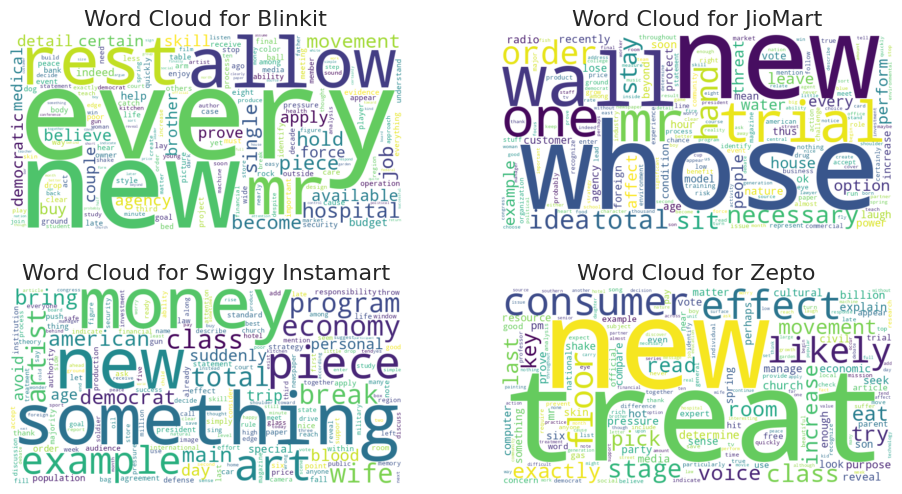

In [27]:
#4.Creating Word cloud for Agent Names

stop_words = stopwords.words('english')

# Text Preprocessing Function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and numbers
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply text preprocessing to the 'Review_Text' column
df['cleaned_reviews'] = df['Review_Text'].apply(preprocess_text)
Agent_Name_groups = df.groupby('Agent_Name')['cleaned_reviews'].apply(' '.join)
fig, axes = plt.subplots(2, 2, figsize=(10,6))
axes = axes.flatten()

# Iterate over the groups and plot each word cloud in a subplot
for idx, (Agent_Name, reviews) in enumerate(Agent_Name_groups.items()):
    # Generate a Word Cloud for the reviews of each Agent_Name
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews)

    # Plot the Word Cloud
    ax = axes[idx]  # Get the current subplot axis
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')  # Hide axes
    ax.set_title(f"Word Cloud for {Agent_Name}", fontsize=16)


plt.tight_layout()
plt.subplots_adjust(top=0.85, bottom=0.1, hspace=0.3)  # top, bottom, and horizontal space
plt.show()


Agent: Zepto
Agent: JioMart
Agent: Blinkit
Agent: Swiggy Instamart


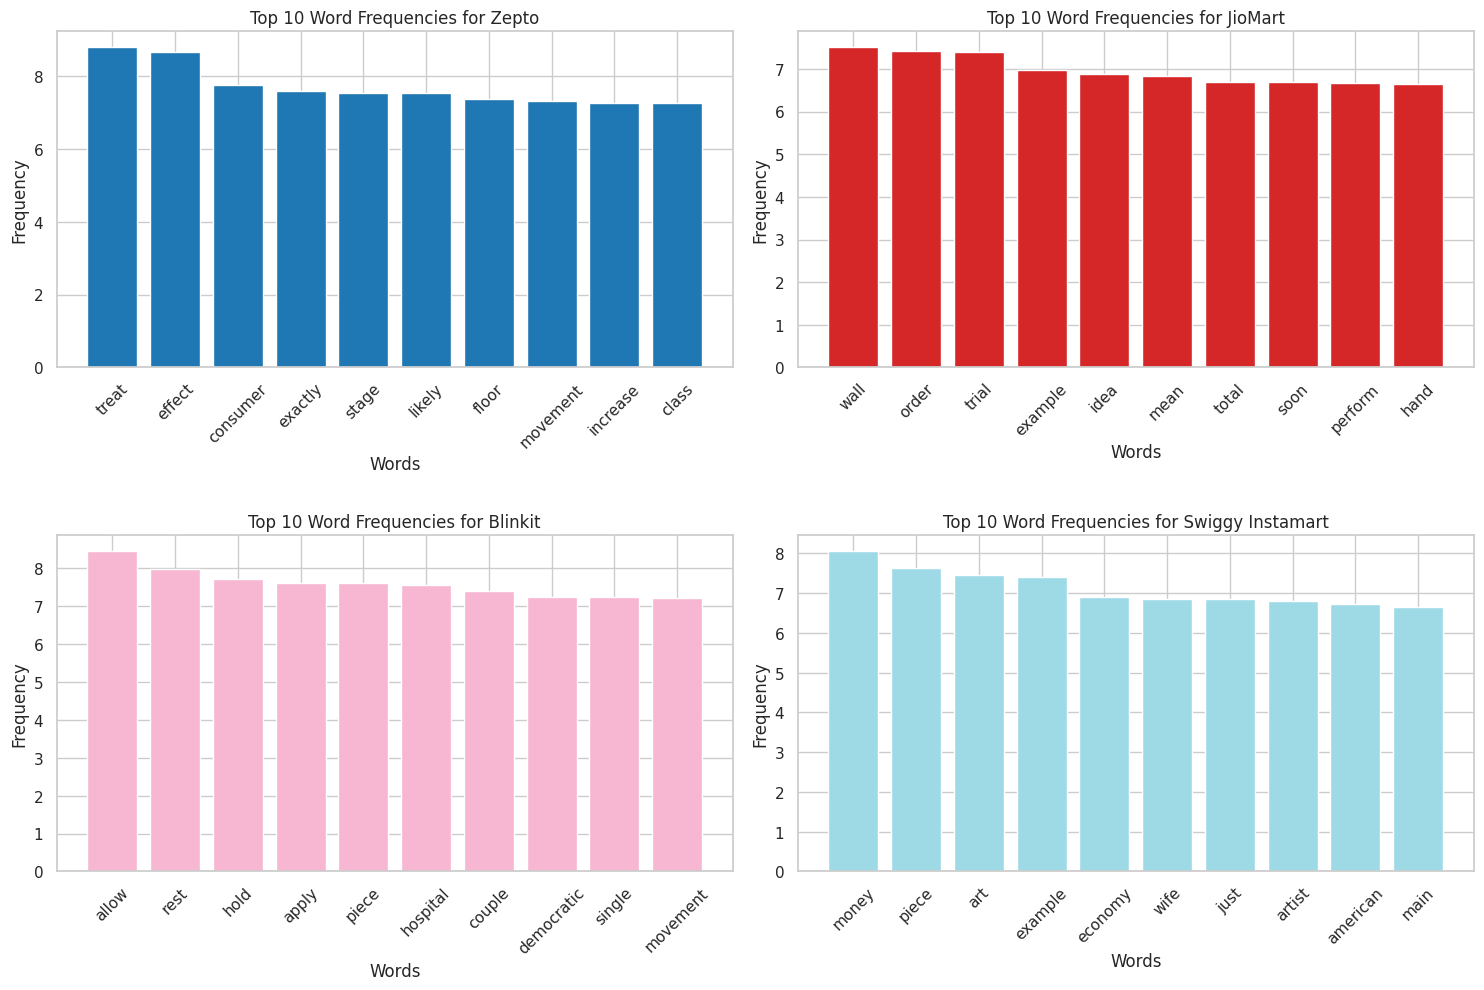

In [28]:
#5. Agent wise key word extraction  by TfidfVectorizer

# Function to extract top keywords and their frequencies by group (Agent)
def extract_keywords_by_group(df, group_col, text_col):
    group_keywords = {}
    for group in df[group_col].unique():
        # Get reviews for each agent
        group_data = df[df[group_col] == group]

        if group_data.empty:  # Check if there are no reviews for the agent
            group_keywords[group] = {}
            continue

        # Use TfidfVectorizer to extract keywords for the agent
        vectorizer = TfidfVectorizer(stop_words='english')
        tfidf_matrix = vectorizer.fit_transform(group_data[text_col])
        feature_names = vectorizer.get_feature_names_out()
        summed_tfidf = tfidf_matrix.sum(axis=0).A1
        word_freq = {feature_names[i]: summed_tfidf[i] for i in range(len(feature_names))}
        group_keywords[group] = word_freq
    return group_keywords

# Extract agent-wise keyword frequencies
agent_keywords = extract_keywords_by_group(df, 'Agent_Name', 'Review_Text')
num_agents = len(agent_keywords)
fig = plt.figure(figsize=(15, 12))

# Prepare a list of unique colors for each agent using a colormap
colormap = cm.get_cmap('tab20', num_agents)  # Get a colormap (up to 20 unique colors)
legend_labels = []

# Loop through each agent and plot its top keywords in the respective subplot
for idx, (agent, word_freq) in enumerate(agent_keywords.items()):
    print(f"Agent: {agent}")

    # Sort keywords by frequency (descending)
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

    # Ensure that there are top words and frequencies to extract
    if sorted_word_freq:
        top_words, top_freq = zip(*sorted_word_freq[:10])  # Extract top 10 keywords

        # Ensure both top_words and top_freq are valid lists
        if isinstance(top_words, tuple) and isinstance(top_freq, tuple):
            top_words = list(top_words)
            top_freq = list(top_freq)

        # Plotting bar graph for each agent on its respective subplot
        if idx < 2:
            ax = plt.subplot(2, 2, idx + 1)  # First row: 2 subplots
        else:
            ax = plt.subplot(2, 2, idx + 1)  # Second row: 2 subplots

        color = colormap(idx)  # Get a unique color for each agent
        ax.bar(top_words, top_freq, color=color)  # Apply the unique color to the bars
        ax.set_title(f"Top 10 Word Frequencies for {agent}")
        ax.set_xlabel('Words')
        ax.set_ylabel('Frequency')
        ax.tick_params(axis='x', rotation=45)
        legend_labels.append(agent)

    else:
        print(f"No keywords found for agent {agent}.")

plt.tight_layout()
plt.subplots_adjust(top=0.9, bottom=0.20, hspace=0.5)
plt.show()